<h2> Lab 4

In [31]:
#define the path to the template given to you on Canvas, mitr_temp.png
mitr_path='mitr_temp.png'
#Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2  #for plotting the MIT reactor core
#Sklearn tools
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#Keras specials
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

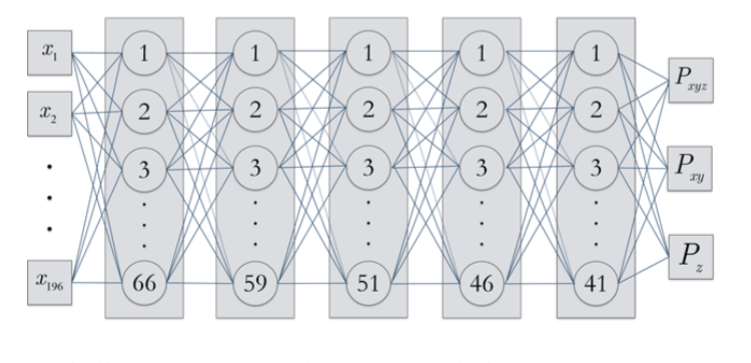

<h3> Exercise Set 1

(a) There are 196 inputs and 3 outputs\
(b) The netork has a depth of 5 and a max width of 66\
(c) It is fully connected because every node in one layer is attached to every other node in the surrounding layer(s)\
(d) It effects how the weights and biases are updated after each epoch to move towards minimizing the loss function.\
(e) Linear for continuous data, softmax for discrete classes\
(f) The model parameters will updated 125 times (1000/8) per epoch.\
(g) Without backpropagation, the gradient of the loss function will never be calculated, so the optimizer will not know how to efficiently update the model weights and biases. \
(h) Ordered by complexity: Linear Regression, Decision Trees, Random Forests, FNN. Linear regression is the simplest form of machine learning, with the model only predicting linear data. A Random forest is a collection of many decision trees, so it is more complex than a single decision tree. An FNN minimizes the loss function in a more sophisticated way, and by their fully-connected nature they can grow in complexity very quickly. This is also the order of increasing number of hyperparameters. 


<h3> Exercise Set 2

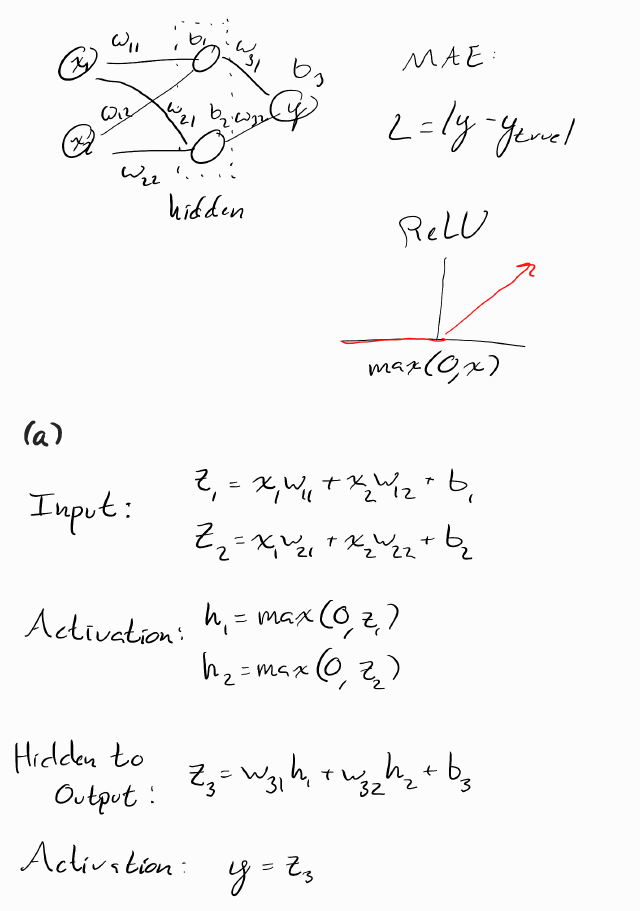

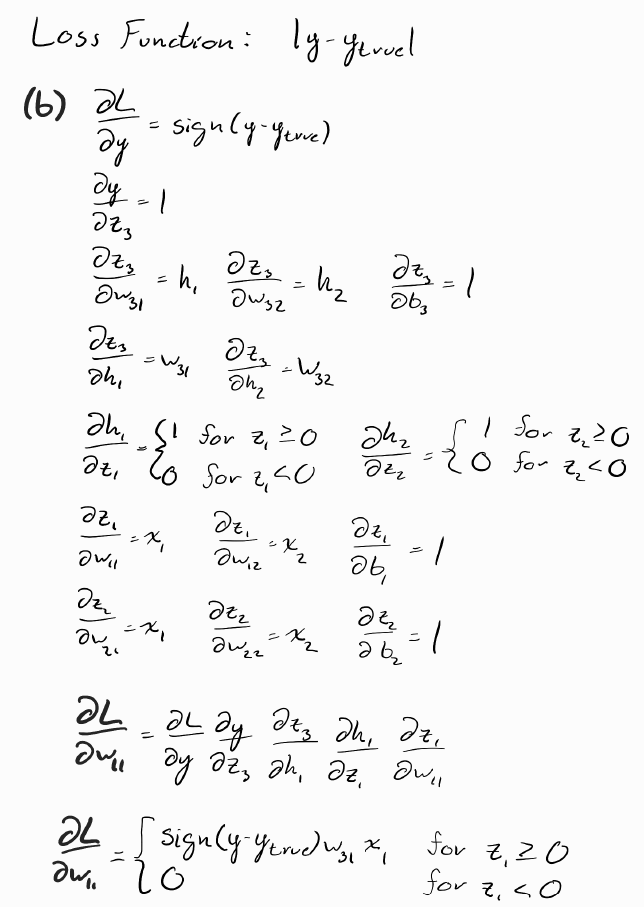

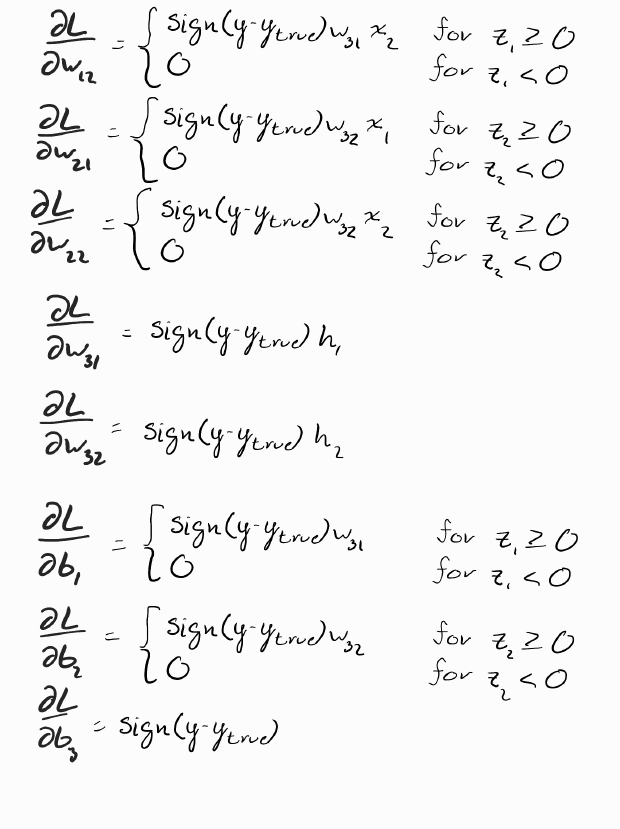

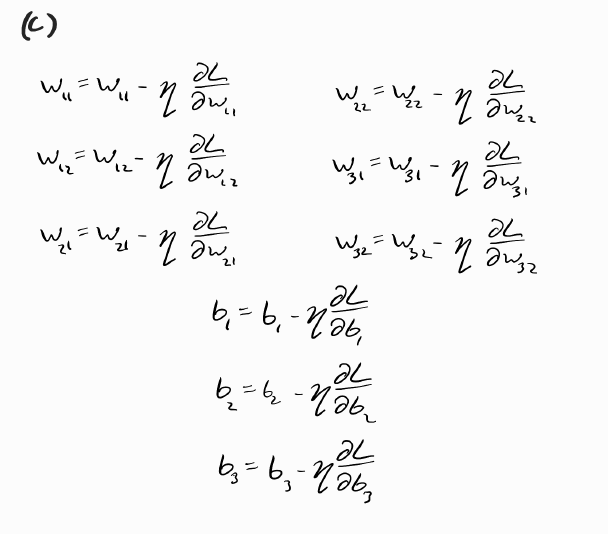

<h3> Exercise Set 3

In [2]:
# Exercise Set 3 (a)
xurl = 'https://raw.githubusercontent.com/aims-umich/ners590data/main/crx.csv'
yurl = 'https://raw.githubusercontent.com/aims-umich/ners590data/main/powery.csv'
xdata = pd.read_csv(xurl)
ydata = pd.read_csv(yurl)
xdata = xdata.dropna()
ydata = ydata.dropna()
print(xdata.head(5)) 
print(ydata.head(5))

         CR1        CR2        CR3        CR4        CR5        CR6
0  25.959917  22.949372  20.853175  24.669168  20.481047  25.357266
1  21.753868  25.360626  20.588530  20.110872  27.467110  25.816585
2  27.429199  23.570180  27.596307  26.390445  23.996037  24.611822
3  21.788159  24.289480  25.195061  23.462239  25.314196  21.665092
4  20.651764  26.309493  24.645944  25.897686  23.748592  26.946972
            A-2           B-1           B-2           B-4           B-5  \
0  25930.916138  22958.314941  21725.516357  22799.333618  21815.979675   
1  25883.078125  22856.061951  21602.108765  22721.063293  21698.868164   
2  25672.208252  22584.910950  21419.950256  22721.304749  21802.134827   
3  25897.859375  22661.180420  21529.638977  22943.255249  21972.662415   
4  25761.079712  22576.364319  21405.163879  22783.927185  21851.152466   

            B-7           B-8           C-1           C-2           C-3  ...  \
0  22785.586487  21279.806152  18421.966827  18484.818298  18

In [3]:
# Exercise Set 3 (b)
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, random_state=42, test_size=0.2)

In [4]:
# Exercise Set 3 (c)
xscaler = MinMaxScaler()
yscaler = MinMaxScaler()
Xtrain = xscaler.fit_transform(xtrain)
Xtest = xscaler.transform(xtest)
Ytrain = yscaler.fit_transform(ytrain)
Ytest = yscaler.transform(ytest)

In [5]:
# Exercise Set 4
num_dens_layers = 6                      #including the input/first layer
n_nodes=[50, 200, 200, 200, 200, 200]  #node per layer
model = Sequential()
model.add(Input(shape=(Xtrain.shape[1],)))
model.add(Dense(n_nodes[0], kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
for i in range(1,num_dens_layers):
    model.add(Dense(n_nodes[i], kernel_initializer='normal',activation='relu')) #Last layer (use linear activation and set nodes to number of Y columns/labels/outputs
model.add(Dense(Ytrain.shape[1], kernel_initializer='normal',activation='linear'))

2024-09-25 22:17:11.662705: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
# Exercise Set 3 (e)
model.compile(loss='mean_absolute_error', optimizer=Adam(6e-4), metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                350       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 200)               10200     
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 200)               40200     
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                                 
 dense_5 (Dense)             (None, 200)               4

_________________________________________________________________


<h3> Exercise Set 4

In [34]:
# Exercise Set 4 (a)

cp1 = ReduceLROnPlateau(monitor='val_mean_absolute_error', factor=0.9, patience=5, min_lr=0, verbose=1)
cp2 = ModelCheckpoint('best_model.keras', monitor='val_mean_absolute_error', save_best_only=True, mode='min', verbose=1)
cp3 = ModelCheckpoint('last_model.keras', monitor='val_mean_absolute_error', save_best_only=False, mode='min', verbose=1) # Always saves, so will find last model
cb_list = [cp1, cp2, cp3]

In [8]:
# Exercise Set 4 (b)
history = model.fit(Xtrain, Ytrain, epochs=100, batch_size=8, validation_split = 0.15, callbacks=cb_list, verbose=True)

Epoch 1/100
71/85 [========================>.....] - ETA: 0s - loss: 0.2483 - mean_absolute_error: 0.2483
Epoch 1: val_mean_absolute_error improved from inf to 0.17031, saving model to best_model.keras

Epoch 1: saving model to last_model.keras
85/85 [==============================] - 2s 7ms/step - loss: 0.2358 - mean_absolute_error: 0.2358 - val_loss: 0.1703 - val_mean_absolute_error: 0.1703 - lr: 6.0000e-04
Epoch 2/100
77/85 [==========================>...] - ETA: 0s - loss: 0.1721 - mean_absolute_error: 0.1721
Epoch 2: val_mean_absolute_error improved from 0.17031 to 0.16461, saving model to best_model.keras

Epoch 2: saving model to last_model.keras
85/85 [==============================] - 0s 5ms/step - loss: 0.1730 - mean_absolute_error: 0.1730 - val_loss: 0.1646 - val_mean_absolute_error: 0.1646 - lr: 6.0000e-04
Epoch 3/100
74/85 [=========================>....] - ETA: 0s - loss: 0.1722 - mean_absolute_error: 0.1722
Epoch 3: val_mean_absolute_error improved from 0.16461 to 0.1633

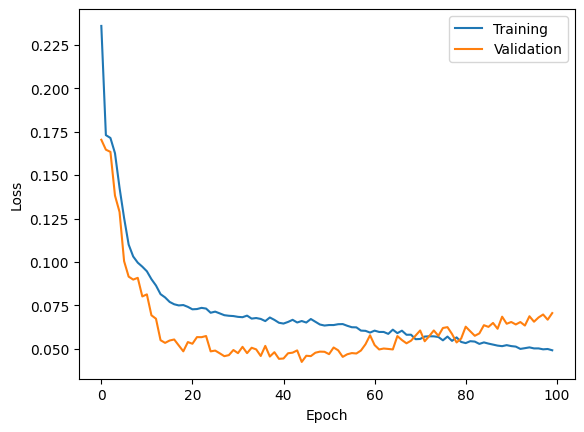

In [10]:
# Exercise Set 4 (c)
train_err=history.history['mean_absolute_error']
val_err=history.history['val_mean_absolute_error']
plt.figure()
plt.plot(train_err, label='Training')
plt.plot(val_err, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

There is some overfitting, since the model performs better on training data than it does on the validation data.

In [18]:
# Exercise Set 4 (d)
best = load_model('best_model.keras')
last = load_model('last_model.keras')
bestY = best.predict(Xtest)
lastY = last.predict(Xtest)

def metrics(true, predict):
    return mean_absolute_error(true, predict), mean_absolute_percentage_error(true, predict), root_mean_squared_error(true, predict), r2_score(true, predict)

metdf = pd.DataFrame((metrics(Ytest, bestY), metrics(Ytest, lastY)), columns=['MAE', 'MAPE', 'RMSE', 'R2'], index = ['best', 'last'])
print(metrics)

7/7 [==============================] - 0s 2ms/step
<function metrics at 0x7f5441b16f20>


There is a significant difference between the best and last model, because the last model is overfit to the training data. 

In [28]:
# Exercise Set 4 (e)
r2_list = []
for i in range(Ytest.shape[1]):
    r2_list.append(r2_score(Ytest[:,i], bestY[:,i]))
r2df = pd.DataFrame(r2_list, columns = ['r2_score'], index=ydata.columns)
print(r2df)

      r2_score
A-2   0.935473
B-1   0.961713
B-2   0.950453
B-4   0.960421
B-5   0.963997
B-7   0.963895
B-8   0.973125
C-1   0.825255
C-2   0.803998
C-3   0.974290
C-4   0.793282
C-5   0.825811
C-6   0.908420
C-7   0.830125
C-8   0.970144
C-9   0.945221
C-10  0.944211
C-11  0.944142
C-12  0.937758
C-13  0.975136
C-14  0.947730
C-15  0.964128


It looks like some outputs are being weekly predicted. In paticular, C-1, C-2, C-4, C-5, and C-7 all have $ R^2 $ scores of less than 0.9

1/1 [==============================] - 0s 106ms/step


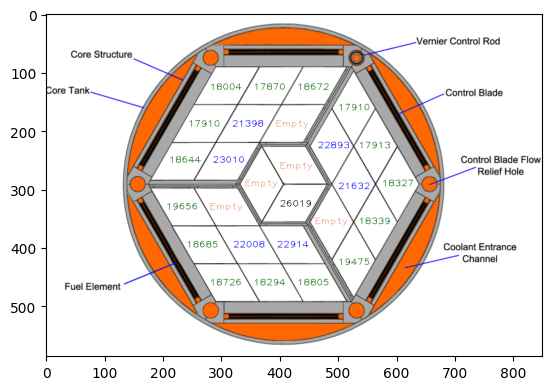

In [32]:
# Exercise Set 4 (f)

###############
# Copied Code #
###############
def plot_mitr (model, x, template_path, yscaler=None):
    pos=[(400,330), (465,230), (500,300), (395,400), (320,400), (285,255), (318,193),
         (500,165), (535,230), (575,295), (535,360), (500, 430), (430, 465), (355, 465), (280, 465),
         (240,400), (205, 335), (210,255), (243,193), (280,130), (355,130), (430,130),
         (393,193), (460,360), (280, 335), (400,265), (340,295)]
    
    Ynn=model.predict(np.array([x,]))
    if yscaler:
        Ynn=yscaler.inverse_transform(Ynn)
    Ynn=Ynn.flatten().tolist()
        
    image = cv2.imread(template_path)
    for i in range(len(pos)):
        if i==0:
            image=cv2.putText(img=np.copy(image), text=str(int(Ynn[i])), org=pos[i],
                                      fontFace=1, fontScale=1.1, color=(0,0,0))
        if i in [1,2,3,4,5,6]:
            image=cv2.putText(img=np.copy(image), text=str(int(Ynn[i])), org=pos[i],
                                      fontFace=1, fontScale=1.1, color=(0,0,255)) 
        if i in list(range(7,22)):
            image=cv2.putText(img=np.copy(image), text=str(int(Ynn[i])), org=pos[i],
                                      fontFace=1, fontScale=1.1, color=(0, 100, 0)) 
    
        if i in list(range(22,28)):
            image=cv2.putText(img=np.copy(image), text=str('Empty'), org=pos[i],
                                      fontFace=1, fontScale=1.1, color=(233, 150, 122))            
    plt.imshow(image)
    cv2.imwrite("mitr.jpg", image, [int(cv2.IMWRITE_JPEG_QUALITY), 300])
    plt.show()


plot_mitr(model=model , yscaler=yscaler , template_path = mitr_path, x=Xtest[0,:])

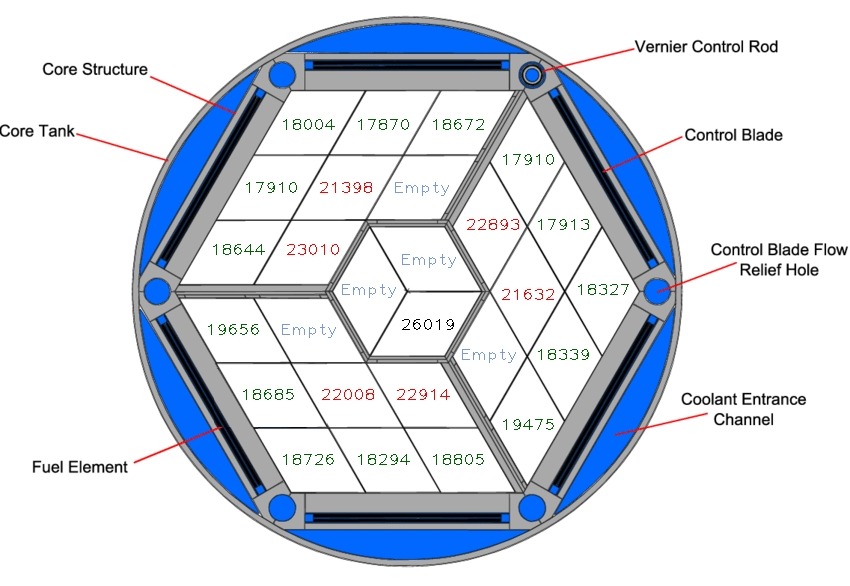

In [33]:
from IPython.display import Image
Image('mitr.jpg')

The element with the maximum power is at A-2. This is justifiable by it being in the center of the nuclear reactor. The elements with the smallest powers are along the edges, at C-1 through C-15. It makes sense that the fuel elements closest to the control rods would have the lowest power output.